In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [12]:
df=pd.read_csv('telecom_churn.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [14]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [16]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [17]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
#Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.81498972,  0.32388048, -0.61444668, ..., -0.07520216,
        -0.03472422, -0.29709755],
       [ 0.76425984,  0.32388048,  1.62748051, ...,  0.74902185,
         0.6321183 , -0.29709755],
       [-0.33870811,  0.32388048,  1.62748051, ...,  0.21389134,
         0.45850249, -0.26121768],
       ...,
       [-0.86512463,  0.32388048, -0.61444668, ..., -0.97323726,
         1.20031547, -0.3688573 ],
       [ 1.71682307,  0.32388048, -0.61444668, ..., -0.62878544,
        -0.51216768, -0.11769819],
       [-1.61714823,  0.32388048,  1.62748051, ..., -0.98553911,
        -1.41970484, -0.58413653]])

In [20]:
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.27279233,  0.3350143 , -0.62642243, ..., -0.08790331,
         2.55851252,  1.15848864],
       [-0.8877333 ,  0.3350143 , -0.62642243, ..., -1.10258963,
         0.32780258,  0.9084995 ],
       [-0.10563994,  0.3350143 , -0.62642243, ..., -2.53508797,
        -0.8111995 , -1.23426457],
       ...,
       [-0.6102163 ,  0.3350143 , -0.62642243, ..., -1.34133935,
         0.27656719,  0.19424481],
       [-0.96341975,  0.3350143 , -0.62642243, ..., -0.98321477,
        -0.70478754,  0.72993583],
       [ 0.97919923,  0.3350143 , -0.62642243, ...,  0.32990871,
         0.658862  , -1.51996645]])

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       940
           1       0.87      0.48      0.62       160

    accuracy                           0.91      1100
   macro avg       0.89      0.73      0.78      1100
weighted avg       0.91      0.91      0.90      1100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


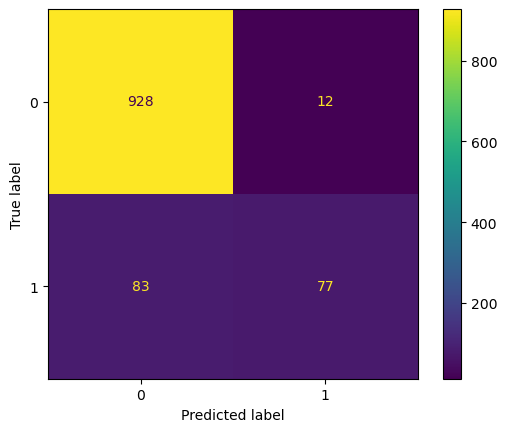

In [21]:
#decision tree

clfd = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10)
clfd.fit(X_train, y_train)

pd = clfd.predict(X_test)
print(classification_report(y_test, pd))
plot_confusion_matrix(clfd, X_test, y_test) 

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       940
           1       0.89      0.63      0.74       160

    accuracy                           0.93      1100
   macro avg       0.91      0.81      0.85      1100
weighted avg       0.93      0.93      0.93      1100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


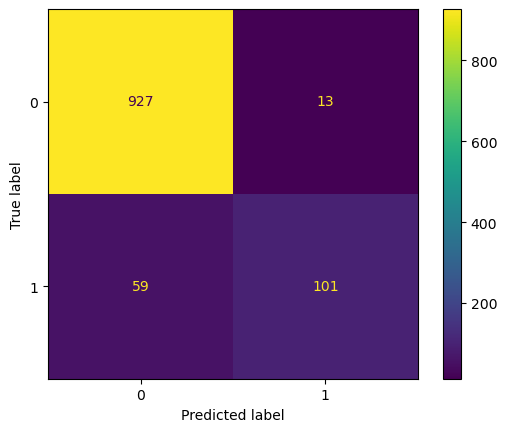

In [22]:
#random forest

clfr = RandomForestClassifier(n_estimators=100, random_state=0)
clfr.fit(X_train, y_train)

pr = clfr.predict(X_test)
print(classification_report(y_test, pr))
plot_confusion_matrix(clfr, X_test, y_test)  

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       940
           1       0.88      0.67      0.76       160

    accuracy                           0.94      1100
   macro avg       0.92      0.83      0.86      1100
weighted avg       0.94      0.94      0.94      1100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


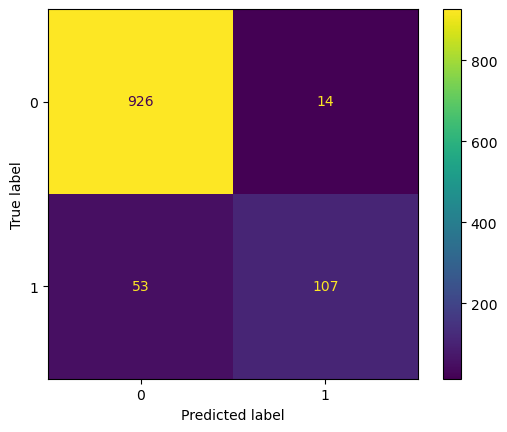

In [24]:
#gradient boosting

clfg = GradientBoostingClassifier(n_estimators=200, max_depth=2, random_state=0)
clfg.fit(X_train, y_train)

pg = clfg.predict(X_test)
print(classification_report(y_test, pg))
plot_confusion_matrix(clfg, X_test, y_test) 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       940
           1       0.76      0.39      0.51       160

    accuracy                           0.89      1100
   macro avg       0.83      0.68      0.73      1100
weighted avg       0.88      0.89      0.88      1100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


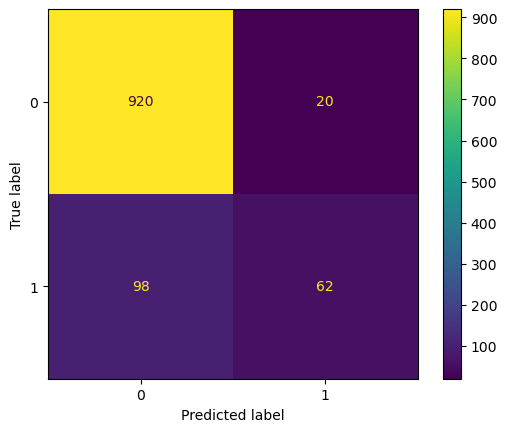

In [25]:
#knn

clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
print(classification_report(y_test, pk))
plot_confusion_matrix(clfk, X_test, y_test) 

In [26]:
#AUC ROC

p1 = clfd.predict_proba(X_test)
p2 = clfr.predict_proba(X_test)
p3 = clfg.predict_proba(X_test)
p4 = clfk.predict_proba(X_test)

In [27]:
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
auc_score3 = roc_auc_score(y_test, p3[:,1])
auc_score4 = roc_auc_score(y_test, p4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8666821808510639 0.9288430851063829 0.9180751329787233 0.8756183510638298


In [28]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

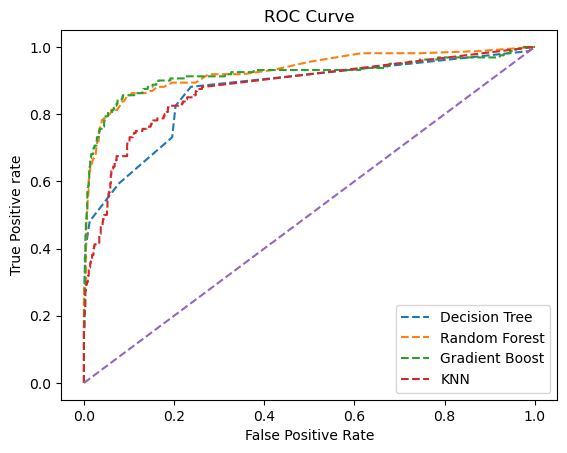

In [31]:
plt.plot(fpr1, tpr1, linestyle='--', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--', label='Gradient Boost')
plt.plot(fpr4, tpr4, linestyle='--', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [ ]:
#Conclusion

'''
A) Step to retain customers:
    1. More Customer Service calls mean the customer is more prone to churn.
    2. Optimize the price of talk time for customers
    3. Introduce a data plan to those customers who are using data without data plans as soon as possible
    4. Introduce exciting data plans for a few customers and optimizing its price can help retain customers
    
B) ML Models
    1. Gradient Boost and Random Forest are the best
    2. Gradientboost, decision tree, KNN are hyperparameter tuned while Random forest is not hyperparameter tuned.
'''